In [2]:
import pandas as pd

In [3]:
df_source = pd.read_excel(r'Dialogue.xlsx')
df_source.head()

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1,1,8,4,I should have known that you would be here...P...,NaN,NaN,NaN,NaN
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...",NaN,NaN,NaN,NaN
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.",NaN,NaN,NaN,NaN
3,4,1,8,7,And the boy?,NaN,NaN,NaN,NaN
4,5,1,8,4,Hagrid is bringing him.,NaN,NaN,NaN,NaN


In [15]:
df_data = df_source[['Character ID','Dialogue']]
df_data.index = df_data['Character ID']
df_data = df_data.drop('Character ID',axis=1)
df_data

,Dialogue
Character ID,
4,I should have known that you would be here...P...
7,"Good evening, Professor Dumbledore. Are the ru..."
4,"I'm afraid so, Professor. The good, and the bad."
7,And the boy?
4,Hagrid is bringing him.
...,...
1,Then Slytherin House will have gained a wonder...
84,Really?
1,Really.


In [26]:
#找出所有包含Harry Potter的行
df_data2 = df_data[df_data['Dialogue'].str.contains('Harry Potter').astype('bool')]
df_data2

,Dialogue
Character ID,
4,Good luck...Harry Potter.
92,Bless my soul. It's Harry Potter.
5,"They're goblins, Harry. Clever as they come go..."
130,And does Mr. Harry Potter have his key?
1,I'm Harry. Harry Potter.
...,...
6,For myself and a few select members of the sta...
9,Give me Harry Potter. Do this and none shall b...
4,There will come a time when Harry Potter must ...


In [49]:
#统计每一行出现Harry Potter的次数
df_data2['Dialogue'].str.count('Harry Potter')


Character ID
4      1.0
92     1.0
5      1.0
130    1.0
1      1.0
      ... 
6      1.0
9      3.0
4      1.0
9      1.0
9      1.0
Name: Dialogue, Length: 91, dtype: float64

In [30]:
df_data2['次数'] = df_data2['Dialogue'].str.count('Harry Potter')

D:\temp\ipykernel_10568\3743135677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data2['次数'] = df_data2['Dialogue'].str.count('Harry Potter')


In [42]:
df_times = df_data2.groupby(df_data2.index)[['次数']].sum()
df_times

,次数
Character ID,
1,5.0
2,1.0
3,4.0
4,6.0
5,2.0
6,3.0
7,4.0
9,10.0
10,2.0


In [52]:
import seaborn as sns
from matplotlib import pyplot as plt

AttributeError: 'Figure' object has no attribute 'set_size_incehs'

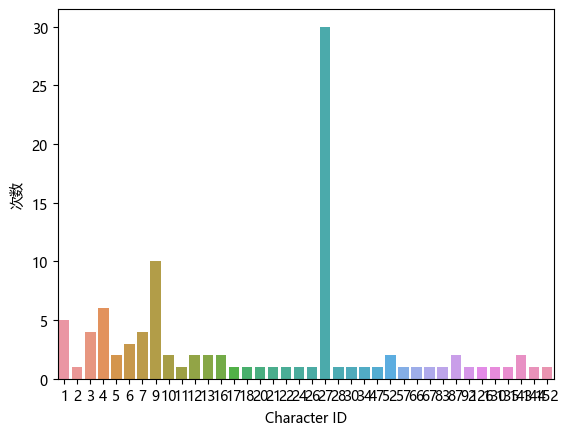

In [53]:
g = sns.barplot(x=df_times.index,y=df_times['次数'])
g.figure.set_size_incehs(20, 5)